> # Question: Are there geographic hotspots where childs mortality and morbidity cluster?

## **Data Exploration**

###Goals:


1.   understand variables and values
2.   spot problems (missing, outliers, inconsistencies)
3. summarize distributions
4. discover relationships worth analyzing later.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/KR_cleaned_df.csv")

# Show all variables names
print(df.columns.tolist())

['Unnamed: 0', 'V024', 'V026', 'V102', 'V106', 'B5', 'B6', 'B7', 'B8', 'M18', 'H11', 'H12A', 'H12B', 'H12C', 'H12D', 'H12E', 'H12G', 'H12J', 'H12K', 'H12M', 'H12S', 'H12T', 'H12U', 'H12X', 'H13', 'H13B', 'H14', 'H15', 'H15A', 'H15B', 'H15C', 'H15D', 'H15E', 'H15F', 'H15G', 'H15H', 'H15I', 'H20', 'H22', 'H31', 'H31B', 'H31C', 'H32A', 'H32B', 'H32C', 'H32D', 'H32E', 'H32G', 'H32K', 'H32S', 'H32T', 'H32X', 'H32Y', 'H37A', 'H37B', 'H37D', 'H37DA', 'H37E', 'H37AA', 'H37AB', 'H37H', 'H37I', 'H37J', 'H37K', 'H37L', 'H37M', 'H37X', 'H37Y', 'H37Z', 'V190', 'M13']


### 1. Basic Data Check

In [ ]:
df.rename(columns={"Unnamed: 0": "id"}, inplace=True)
df.head()

,id,V024,V026,V102,V106,B5,B6,B7,B8,M18,...,H37I,H37J,H37K,H37L,H37M,H37X,H37Y,H37Z,V190,M13
0,0,11.0,1.0,1.0,0.0,1.0,-1.0,-1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
1,1,11.0,1.0,1.0,0.0,1.0,-1.0,-1.0,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,2,11.0,1.0,1.0,0.0,2.0,100.0,0.0,-1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0
3,3,11.0,1.0,1.0,0.0,2.0,100.0,0.0,-1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0
4,4,11.0,1.0,1.0,0.0,2.0,100.0,0.0,-1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0


In [ ]:
# Dimensions
print("Shape (rows, cols):", df.shape)

# Data types
print(df.dtypes)

# Summary of data types
print(df.info())

# Check if IDs are unique
# print("Total IDs:", df['id'].nunique())
print("Duplicated IDs:", df["id"].duplicated().sum())

Shape (rows, cols): (19491, 71)
id        int64
V024    float64
V026    float64
V102    float64
V106    float64
         ...   
H37X    float64
H37Y    float64
H37Z    float64
V190    float64
M13     float64
Length: 71, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19491 entries, 0 to 19490
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      19491 non-null  int64  
 1   V024    19491 non-null  float64
 2   V026    19491 non-null  float64
 3   V102    19491 non-null  float64
 4   V106    19491 non-null  float64
 5   B5      19491 non-null  float64
 6   B6      19491 non-null  float64
 7   B7      19491 non-null  float64
 8   B8      19491 non-null  float64
 9   M18     19491 non-null  float64
 10  H11     19491 non-null  float64
 11  H12A    19491 non-null  float64
 12  H12B    19491 non-null  float64
 13  H12C    19491 non-null  float64
 14  H12D    19491 non-null  float64
 15  H12E    19491 non-null 

In [ ]:
# Missing values per column
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

missing_data = pd.DataFrame({"Missing Values": missing, "Percent": missing_percent})

print(missing_data)

      Missing Values  Percent
id                 0      0.0
V024               0      0.0
V026               0      0.0
V102               0      0.0
V106               0      0.0
...              ...      ...
H37X               0      0.0
H37Y               0      0.0
H37Z               0      0.0
V190               0      0.0
M13                0      0.0

[71 rows x 2 columns]


In [ ]:
# Summary statistics
print(df.describe())

                 id          V024          V026          V102          V106  \
count  19491.000000  19491.000000  19491.000000  19491.000000  19491.000000   
mean   10664.357755     18.379919     41.677184      1.860756      0.218049   
std     6114.370246      5.021890     30.235721      0.840548      0.546047   
min        0.000000     11.000000      1.000000      1.000000      0.000000   
25%     5403.500000     14.000000     14.000000      1.000000      0.000000   
50%    10670.000000     18.000000     36.000000      2.000000      0.000000   
75%    15954.500000     22.000000     61.000000      3.000000      0.000000   
max    21217.000000     28.000000    101.000000      3.000000      3.000000   

                 B5            B6            B7            B8           M18  \
count  19491.000000  19491.000000  19491.000000  19491.000000  19491.000000   
mean       1.048689      6.670617     -0.715048      2.320712      4.114001   
std        0.215223     38.593783      2.555544    

### Basic Data Check – Results

The dataset consists of 19,491 observations (rows) and 71 variables (columns).

1. **Unique identifiers:** No duplicates found in the ID variable, confirming each record corresponds to a unique child.

2. **Data types:** All variables are currently stored as float64. This indicates that categorical variables may need to be recoded or converted into appropriate data types (e.g., integer, string, or categorical) for analysis.

3. **Missing data:** There are no missing values across all variables, meaning the dataset is complete.

4. **Value ranges:**  quick notes about min/max ranges:

*   age at death ranges 0–96 months
*   current age ranges 0–6 years
* gestational age at first ANC ranges 0-5


> **Conclusion:** The dataset is complete, with no missing data or duplicate records.

### 2. Demographic & Background Exploration

In [ ]:
# Counts per region
region_counts = df["V024"].value_counts()

# Counts per district
district_counts = df["V026"].value_counts()

# With percentages
region_dist = df["V024"].value_counts(normalize=True) * 100

print(region_counts)
print(region_dist)

V024
22.0    2119
15.0    1738
14.0    1690
13.0    1596
12.0    1418
25.0    1210
28.0    1159
26.0    1117
16.0    1092
17.0    1079
18.0    1046
19.0    1002
21.0     950
11.0     940
20.0     906
24.0     429
Name: count, dtype: int64
V024
22.0    10.871684
15.0     8.916936
14.0     8.670669
13.0     8.188395
12.0     7.275153
25.0     6.207993
28.0     5.946334
26.0     5.730850
16.0     5.602586
17.0     5.535888
18.0     5.366579
19.0     5.140834
21.0     4.874044
11.0     4.822739
20.0     4.648299
24.0     2.201016
Name: proportion, dtype: float64


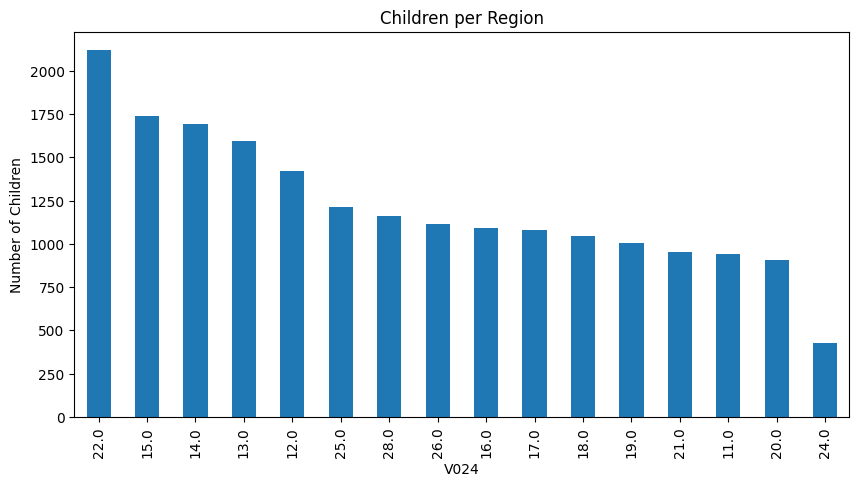

In [ ]:
region_counts.plot(kind="bar", figsize=(10, 5), title="Children per Region")
plt.ylabel("Number of Children")
plt.show()

In [ ]:
# Mother’s Education Level

edu_counts = df["V106"].value_counts()
edu_percent = df["V106"].value_counts(normalize=True) * 100

print(edu_counts)
print(edu_percent)

V106
0.0    16271
1.0     2404
2.0      602
3.0      214
Name: count, dtype: int64
V106
0.0    83.479555
1.0    12.333898
2.0     3.088605
3.0     1.097943
Name: proportion, dtype: float64


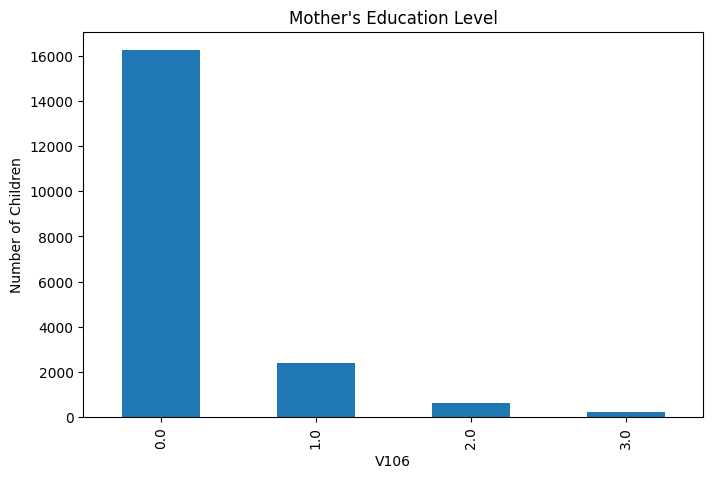

In [ ]:
edu_counts.plot(kind="bar", figsize=(8, 5), title="Mother's Education Level")
plt.ylabel("Number of Children")
plt.show()

### Demographic & Background Exploration - Results

The dataset includes children from multiple regions, with the distribution across regions showing noticeable variation.
* **Banadir (region 22) had the highest number of children**, with 2,119 (≈10.9% of the total),
* Bay (region 24) had the lowest number, with 429 children (≈2.2%).

This indicates some regions are more represented in the dataset than others.


---


Regarding mother’s educational level:
* the majority of mothers had **no formal education (83.5%)**.
* Mothers with primary education represented 12.3%,
* secondary education 3.1%,
* and only 1.1% of mothers had higher education.

This distribution highlights a low overall education level among mothers in the sampled population, which may influence health-seeking behavior and child outcomes.

> **Conclusion:** The dataset shows regional variation in the number of children, with Banadir most represented, and a low educational level among mothers, which could be important for interpreting neonatal mortality and morbidity patterns.

### 3. Child Characteristics

count    19491.000000
mean         2.320712
std          1.772462
min         -1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: B8, dtype: float64


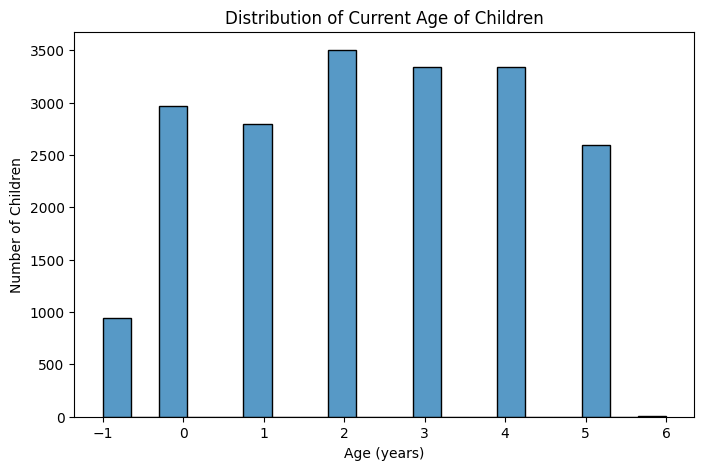

In [ ]:
# Current Age Distribution

import seaborn as sns

# Summary stats
print(df["B8"].describe())

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["B8"], bins=20, kde=False)
plt.title("Distribution of Current Age of Children")
plt.xlabel("Age (years)")
plt.ylabel("Number of Children")
plt.show()

count    949.000000
mean       4.852476
std       10.082118
min        0.000000
25%        0.000000
50%        0.000000
75%        6.000000
max       96.000000
Name: B7, dtype: float64


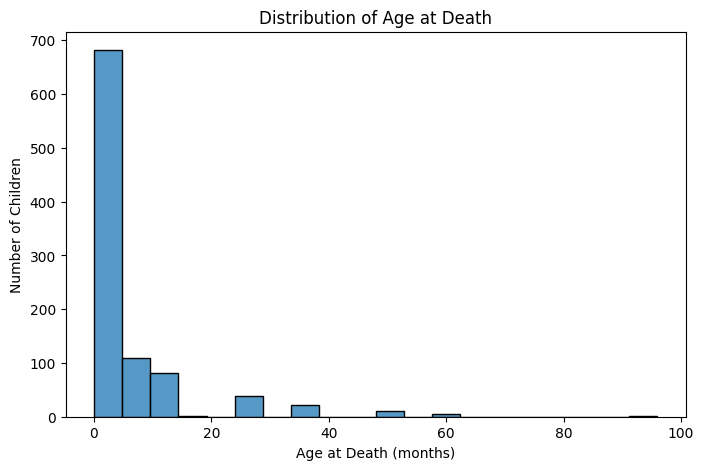

In [ ]:
# Age at Death (for deceased children)

# Filter deceased children
deceased = df[df["B5"] == 2]

# Summary stats
print(deceased["B7"].describe())

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(deceased["B7"], bins=20, kde=False)
plt.title("Distribution of Age at Death")
plt.xlabel("Age at Death (months)")
plt.ylabel("Number of Children")
plt.show()

M18
3.0    11263
8.0     4247
5.0     1119
4.0     1065
1.0     1028
2.0      769
Name: count, dtype: int64
M18
3.0    57.785645
8.0    21.789544
5.0     5.741111
4.0     5.464060
1.0     5.274229
2.0     3.945411
Name: proportion, dtype: float64


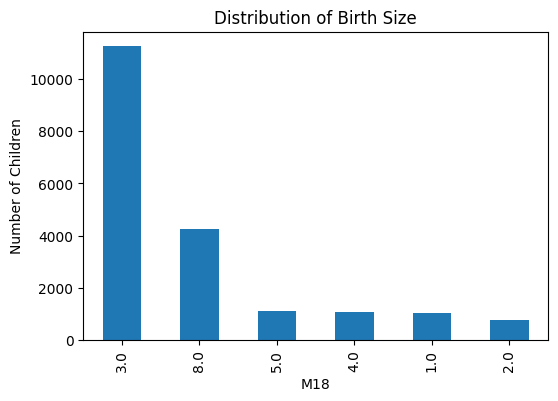

In [ ]:
# Size at Birth (categorical)

# Counts and percentages
size_counts = df["M18"].value_counts()
size_percent = df["M18"].value_counts(normalize=True) * 100

print(size_counts)
print(size_percent)

# Bar chart
size_counts.plot(kind="bar", figsize=(6, 4), title="Distribution of Birth Size")
plt.ylabel("Number of Children")
plt.show()

count    19491.000000
mean         3.055308
std          2.262306
min          0.000000
25%          0.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: M13, dtype: float64


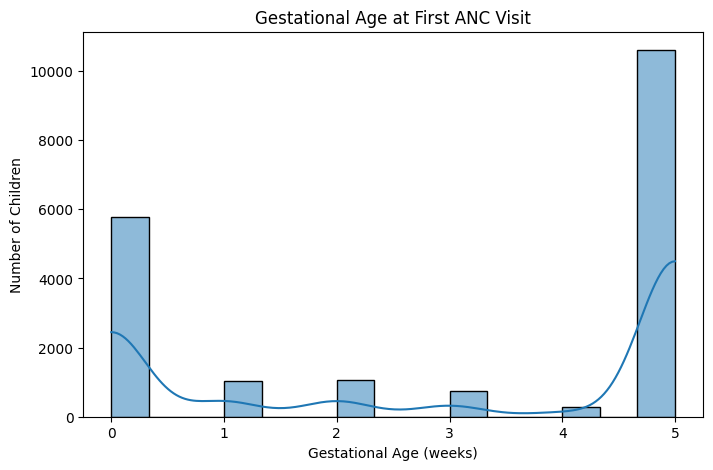

In [ ]:
# Gestational Age at First ANC Visit

# Summary statistics
print(df["M13"].describe())

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["M13"], bins=15, kde=True)
plt.title("Gestational Age at First ANC Visit")
plt.xlabel("Gestational Age (weeks)")
plt.ylabel("Number of Children")
plt.show()

### Child Characterstics - Summary Results

**1. Current Age:**

* Mean age: 2.3 years (min: 0, max: 6).
* Most common age: 2 years (~3,500 children).
* Next most common: 3 and 4 years.


**2. Age at Death (for deceased children):**

* Mean age at death: 4.9 months.
* Minimum: 0 months, Maximum: 96 months.

**3. Size at Birth:**
* Average: 57.8%
* Smaller than average: 5.5%
* Very small: 5.8%
* Larger than average: 3.95%
* Don’t know: 21.8%

**4. Gestational Age at First ANC Visit:**

* No antenatal care: ~6,000 women
* After 8th month: 281 women

### 4. Mortality Exploration

In [ ]:
# Alive vs Dead Counts

alive_counts = (df["B5"] == 1).value_counts()
alive_percent = df["B5"].value_counts(normalize=True) * 100
print(alive_counts, alive_percent)

B5
True     18542
False      949
Name: count, dtype: int64 B5
1.0    95.131086
2.0     4.868914
Name: proportion, dtype: float64


In [ ]:
# Age at Death Categories
"""
Define categories:

Neonatal: <1 month (0–28 days)

Infant: 1–11 months

Child: 12–59 months (1–5 years)
"""


def death_category(age_months):
    if age_months > 0 and age_months <= 1:
        return "Neonatal"
    elif age_months < 12:
        return "Infant"
    elif age_months <= 59:
        return "Child (1-5 years)"
    else:
        return "Above 5 years"


# Apply to deceased only
df["death_category"] = df.apply(
    lambda row: death_category(row["B7"]) if row["B5"] == 2 else None, axis=1
)

# Counts and percentages
death_cat_counts = df["death_category"].value_counts(dropna=True)
death_cat_percent = df["death_category"].value_counts(normalize=True, dropna=True) * 100
print(death_cat_counts, death_cat_percent)

death_category
Infant               753
Child (1-5 years)    149
Neonatal              41
Above 5 years          6
Name: count, dtype: int64 death_category
Infant               79.346681
Child (1-5 years)    15.700738
Neonatal              4.320337
Above 5 years         0.632244
Name: proportion, dtype: float64


### Mortality Exploration - Results

* Alive: 18542 children (95.13%)

* Dead: 949 children (4.9%)

**Among deceased:**

* Neonatal (<1 month): 4.3%

* Infant (1–11 months): 79.35%

* Child (1–5 years): 15.7%
* Above 5 years: 0.6%

### 5. Illness Symptoms Exploration

In [ ]:
# Prevalence

symptoms = [
    "H11",
    "H22",
    "H31",
    "H31C",
]  # H11: Diarreah, H22: Fever, H31: Cough,H31C: breathing_problem
for col in symptoms:
    counts = df[col].value_counts()
    percent = df[col].value_counts(normalize=True) * 100
    print(f"{col}:")
    print(counts, percent, "\n")

H11:
H11
2.0    15528
8.0     3034
1.0      929
Name: count, dtype: int64 H11
2.0    79.667539
8.0    15.566159
1.0     4.766302
Name: proportion, dtype: float64 

H22:
H22
2.0    15414
8.0     2982
1.0     1095
Name: count, dtype: int64 H22
2.0    79.082654
8.0    15.299369
1.0     5.617978
Name: proportion, dtype: float64 

H31:
H31
2.0    15463
8.0     2753
1.0     1275
Name: count, dtype: int64 H31
2.0    79.334052
8.0    14.124468
1.0     6.541481
Name: proportion, dtype: float64 

H31C:
H31C
8.0    18560
1.0      448
2.0      272
3.0      206
6.0        5
Name: count, dtype: int64 H31C
8.0    95.223436
1.0     2.298497
2.0     1.395516
3.0     1.056898
6.0     0.025653
Name: proportion, dtype: float64 



### Illness Symptoms

Diarrhea: 4.8% of children in last 2 weeks

Fever: 5.6%

Cough: 6.5%

Breathing problem:
* 2.3% chest only problems
* 1.4% nose only
* 1.05% Both
* 0.02% other problems

### 6. Health-Seeking Behaviour

In [ ]:
facility_cols = {
    "Gov_Hospital": ["H12A"],
    "Referral Health Centre": ["H12B"],
    "MCH/HC": ["H12C"],
    "Primary Health Unit": ["H12D"],
    "Mobile Clinic": ["H12E"],
    "Other Public": ["H12G"],
    "Private hospital/clinic": ["H12J"],
    "Pharmacy": ["H12K"],
    "other private": ["H12M"],
    "shop": ["H12S"],
    "Traditional practioner": ["H12T"],
    "Market": ["H12U"],
    "other": ["H12X"],
}

# Collapse multiple columns per category into one binary indicator
for key, cols in facility_cols.items():
    df[key] = df[cols].apply(lambda row: 1 if (row == 1).any() else 0, axis=1)

In [ ]:
# No treatment
treatment_cols = list(facility_cols.keys())
df["No_Treatment"] = df[treatment_cols].apply(
    lambda row: 1 if row.sum() == 0 else 0, axis=1
)

In [ ]:
# Group by region
region_behavior = df.groupby("V024")[treatment_cols + ["No_Treatment"]].mean() * 100
region_behavior = region_behavior.reset_index()
print(region_behavior)

    V024  Gov_Hospital  Gov_HealthCenter  Private_Clinic  Pharmacy  \
0   11.0      0.425532          0.000000        0.851064  1.063830   
1   12.0      0.352609          0.000000        0.987306  0.141044   
2   13.0      0.626566          0.062657        1.817043  1.253133   
3   14.0      0.059172          0.000000        0.710059  0.355030   
4   15.0      0.230150          0.000000        1.035673  0.575374   
5   16.0      0.183150          0.000000        1.831502  0.366300   
6   17.0      1.019462          0.000000        0.648749  0.092678   
7   18.0      0.286807          0.000000        0.573614  0.000000   
8   19.0      0.099800          0.099800        0.898204  0.000000   
9   20.0      0.331126          0.110375        1.324503  0.441501   
10  21.0      0.842105          0.105263        1.368421  0.421053   
11  22.0      0.235960          0.000000        0.330345  0.330345   
12  24.0      0.233100          0.000000        0.699301  0.932401   
13  25.0      0.4132

In [ ]:
urban_behavior = df.groupby("V102")[treatment_cols + ["No_Treatment"]].mean() * 100
urban_behavior = urban_behavior.reset_index()
print(urban_behavior)

   V102  Gov_Hospital  Gov_HealthCenter  Private_Clinic  Pharmacy  \
0   1.0      0.474440          0.035583        1.648677  0.865852   
1   2.0      0.673779          0.018716        1.010668  0.280741   
2   3.0      0.209900          0.000000        0.104950  0.034983   

   Traditional  other public  Private hospitl/clinic  other private      shop  \
0     0.059305      0.011861                0.391413       0.023722  0.011861   
1     0.037432      0.000000                0.243309       0.000000  0.000000   
2     0.000000      0.000000                0.000000       0.000000  0.000000   

   Traditional practioner    Market     other  No_Treatment  
0                0.000000  0.000000  0.000000     96.477286  
1                0.018716  0.000000  0.000000     97.716639  
2                0.017492  0.017492  0.017492     99.597691  


In [ ]:
# Compare by mother’s education

edu_behavior = df.groupby("V106")[treatment_cols + ["No_Treatment"]].mean() * 100
edu_behavior = edu_behavior.reset_index()
print(edu_behavior)

   V106  Gov_Hospital  Gov_HealthCenter  Private_Clinic  Pharmacy  \
0   0.0      0.356462          0.018438        0.928031  0.387192   
1   1.0      0.998336          0.041597        1.663894  0.790349   
2   2.0      0.664452          0.000000        0.830565  1.328904   
3   3.0      0.934579          0.000000        1.401869  0.000000   

   Traditional  other public  Private hospitl/clinic  other private      shop  \
0     0.024584      0.000000                0.196669       0.006146  0.000000   
1     0.124792      0.000000                0.249584       0.041597  0.041597   
2     0.000000      0.166113                0.996678       0.000000  0.000000   
3     0.000000      0.000000                0.934579       0.000000  0.000000   

   Traditional practioner    Market     other  No_Treatment  
0                0.012292  0.006146  0.006146     98.057894  
1                0.000000  0.000000  0.000000     96.048253  
2                0.000000  0.000000  0.000000     96.013289  


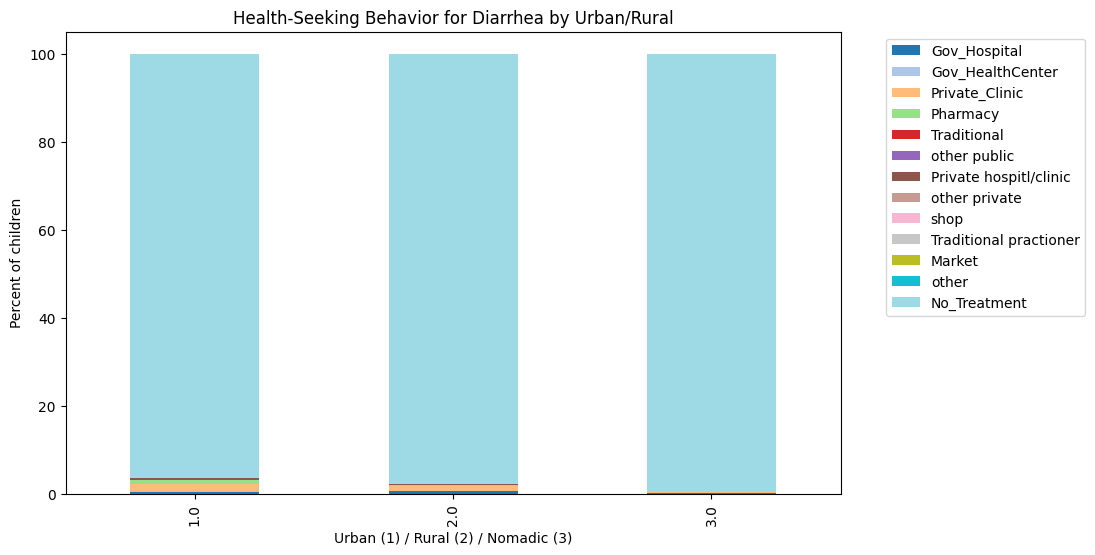

In [ ]:
urban_behavior.set_index("V102")[treatment_cols + ["No_Treatment"]].plot(
    kind="bar", stacked=True, figsize=(10, 6), colormap="tab20"
)
plt.ylabel("Percent of children")
plt.xlabel("Urban (1) / Rural (2) / Nomadic (3)")
plt.title("Health-Seeking Behavior for Diarrhea by Urban/Rural")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### 8. Counts and Rates by Region/District

In [ ]:
# Filter neonatal deaths (<1 month)
df["neonatal_death"] = df.apply(
    lambda row: 1 if (row["B5"] == 2 and row["B7"] > 0 and row["B7"] <= 1) else 0,
    axis=1,
)

# Count births and neonatal deaths by region
region_births = df.groupby("V024")["id"].count()
region_neonatal_deaths = df.groupby("V024")["neonatal_death"].sum()

# Neonatal mortality rate per 1000 live births
neonatal_mortality_rate = (region_neonatal_deaths / region_births) * 1000
print(neonatal_mortality_rate)

V024
11.0    2.127660
12.0    2.820874
13.0    3.132832
14.0    4.142012
15.0    1.150748
16.0    4.578755
17.0    1.853568
18.0    0.000000
19.0    1.996008
20.0    1.103753
21.0    1.052632
22.0    0.943841
24.0    2.331002
25.0    1.652893
26.0    1.790510
28.0    2.588438
dtype: float64


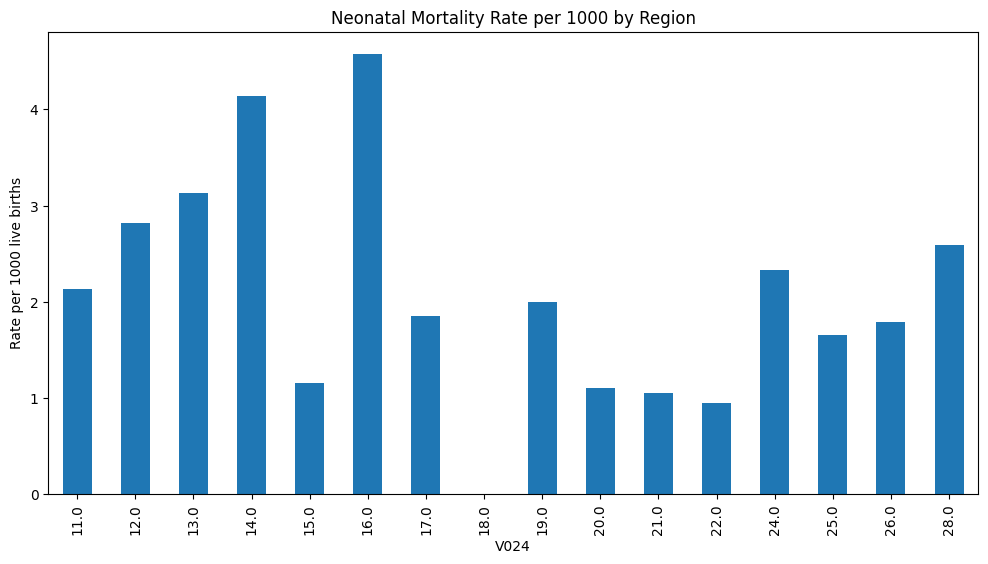

In [ ]:
# Plot neonatal mortality rate
neonatal_mortality_rate.plot(x="region", y="NMR_per_1000", kind="bar", figsize=(12, 6))
plt.title("Neonatal Mortality Rate per 1000 by Region")
plt.ylabel("Rate per 1000 live births")
plt.show()

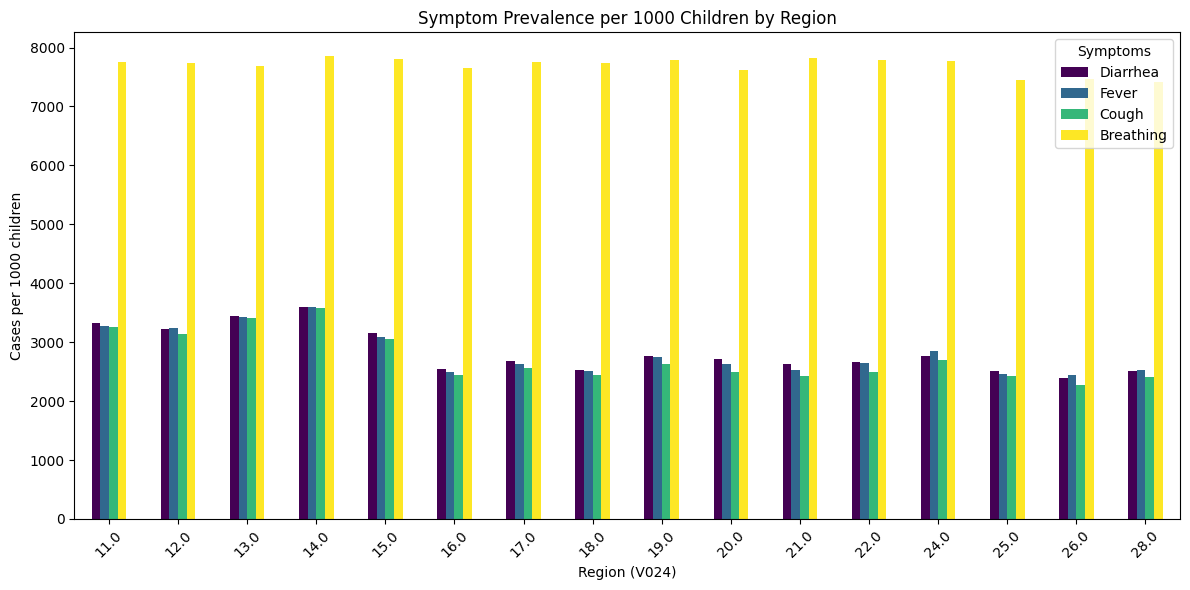

In [ ]:
symptoms = ["H11", "H22", "H31", "H31C"]
symptom_labels = ["Diarrhea", "Fever", "Cough", "Breathing"]  # rename for readability

# Calculate prevalence per 1000 children
rates = {}
for symptom in symptoms:
    rates[symptom] = (
        df.groupby("V024")[symptom].sum() / df.groupby("V024")["id"].count() * 1000
    )

# Convert to DataFrame for easier plotting
morbidity_df = pd.DataFrame(rates)
morbidity_df = morbidity_df.rename(columns=dict(zip(symptoms, symptom_labels)))

# Plot grouped bar chart with different colors
morbidity_df.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Symptom Prevalence per 1000 Children by Region")
plt.ylabel("Cases per 1000 children")
plt.xlabel("Region (V024)")
plt.legend(title="Symptoms")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 9. Urban vs Rural Differences


In [ ]:
# Group by region and residence
urban_rural_mortality = (
    df.groupby(["V024", "V102"])["neonatal_death"].sum()
    / df.groupby(["V024", "V102"])["id"].count()
    * 1000
)
print("neonatal death in Urban vs Rural Differences", urban_rural_mortality)

neonatal death in Urban vs Rural Differences V024  V102
11.0  1.0     6.006006
      2.0     0.000000
      3.0     0.000000
12.0  1.0     6.237006
      2.0     2.293578
      3.0     0.000000
13.0  1.0     3.835091
      2.0     0.000000
      3.0     5.102041
14.0  1.0     3.246753
      2.0     0.000000
      3.0     8.547009
15.0  1.0     0.000000
      2.0     4.683841
      3.0     0.000000
16.0  1.0     4.246285
      2.0     0.000000
      3.0     8.152174
17.0  1.0     2.325581
      2.0     6.493506
      3.0     0.000000
18.0  1.0     0.000000
      2.0     0.000000
      3.0     0.000000
19.0  1.0     2.597403
      2.0     0.000000
      3.0     2.544529
20.0  1.0     0.000000
      2.0     0.000000
      3.0     2.762431
21.0  1.0     0.000000
      2.0     4.761905
      3.0     0.000000
22.0  1.0     2.109705
      2.0     0.000000
      3.0     1.219512
24.0  1.0     3.389831
      2.0     0.000000
      3.0     0.000000
25.0  1.0     0.000000
      2.0     3.984064
 

### 10. Morbidity Hotspots

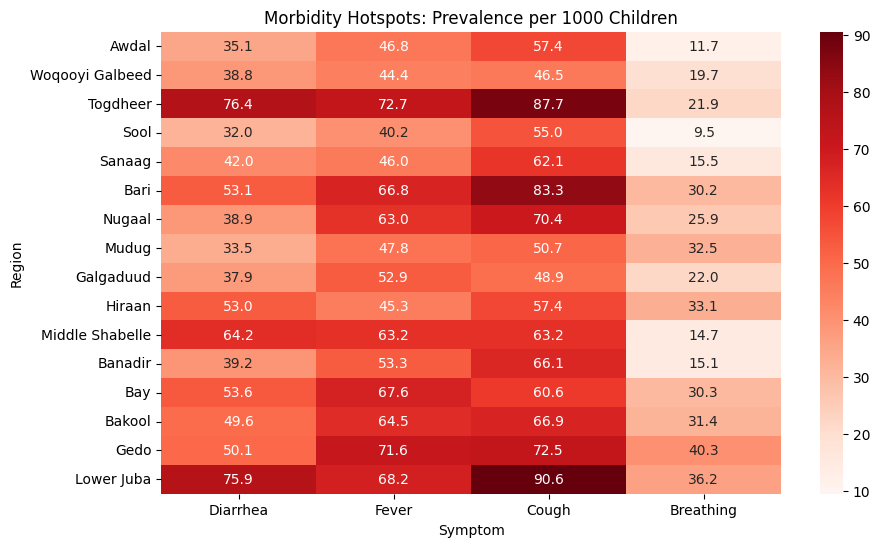

In [ ]:
# Prevalence per 1000 by region
morbidity = pd.DataFrame()

region_map = {
    11: "Awdal",
    12: "Woqooyi Galbeed",
    13: "Togdheer",
    14: "Sool",
    15: "Sanaag",
    16: "Bari",
    17: "Nugaal",
    18: "Mudug",
    19: "Galgaduud",
    20: "Hiraan",
    21: "Middle Shabelle",
    22: "Banadir",
    23: "Lower Shabelle",
    24: "Bay",
    25: "Bakool",
    26: "Gedo",
    27: "Middle Juba",
    28: "Lower Juba",
}

symptoms = [
    "H11",
    "H22",
    "H31",
    "H31C",
]  # H11: Diarreah, H22: Fever, H31: Cough,H31C: breathing_problem

# convert the symptoms to binary results

df["H11_bin"] = df["H11"].apply(lambda x: 1 if x == 1 else 0)  # adjust 1 = yes
df["H22_bin"] = df["H22"].apply(lambda x: 1 if x == 1 else 0)  # adjust 1 = yes
df["H31_bin"] = df["H31"].apply(lambda x: 1 if x == 1 else 0)  # adjust 1 = yes
df["H31C_bin"] = df["H31C"].apply(lambda x: 1 if x == 1 else 0)  # adjust 1 = yes

binary_symptoms = ["H11_bin", "H22_bin", "H31_bin", "H31C_bin"]

symptoms_map = {
    "H11_bin": "Diarrhea",
    "H22_bin": "Fever",
    "H31_bin": "Cough",
    "H31C_bin": "Breathing",
}


for symptom in binary_symptoms:
    morbidity[symptom] = df.groupby("V024")[symptom].mean() * 1000


# Reset index to keep region column
morbidity = morbidity.reset_index()

# Heatmap of regions vs symptoms
plt.figure(figsize=(10, 6))
sns.heatmap(
    morbidity.set_index("V024").rename(columns=symptoms_map),
    annot=True,
    cmap="Reds",
    fmt=".1f",
)  # Renamed columns
plt.title("Morbidity Hotspots: Prevalence per 1000 Children")
plt.ylabel("Region")
plt.xlabel("Symptom")
plt.yticks(
    ticks=morbidity.index + 0.5, labels=morbidity["V024"].map(region_map), rotation=0
)  # Map V024 codes to region names
plt.show()

### 11. Treatment vs Mortality

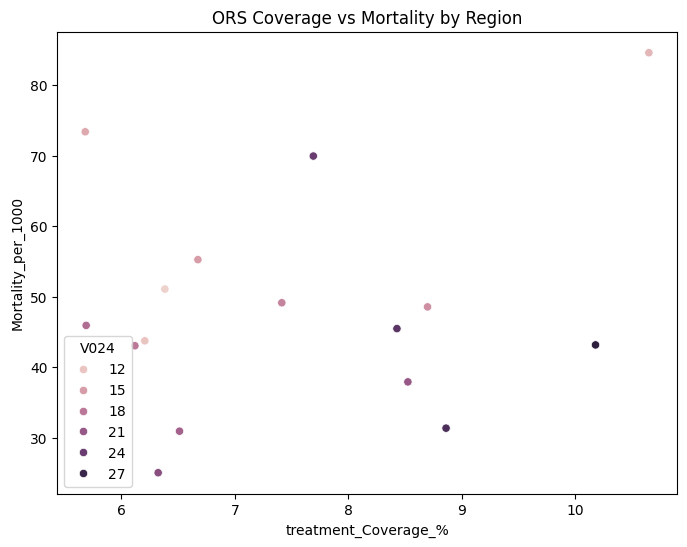

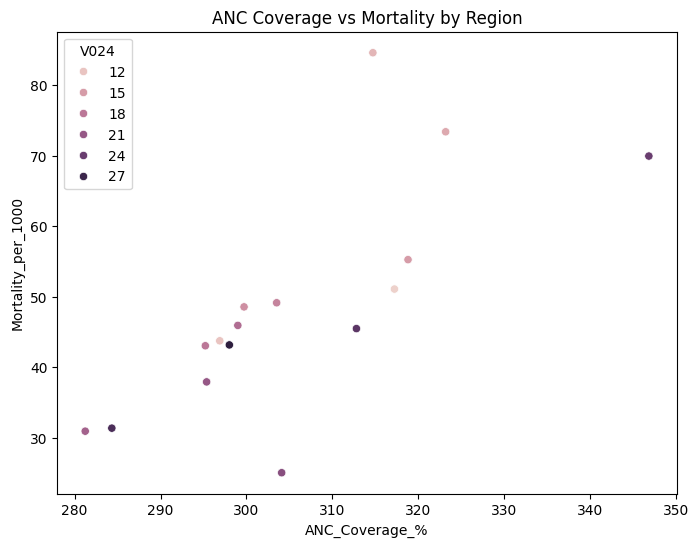

In [ ]:
# treatments group

treatments = [
    "H13",
    "H13B",
    "H14",
    "H15",
    "H15A",
    "H15B",
    "H15C",
    "H15D",
    "H15E",
    "H15F",
    "H15G",
    "H15H",
    "H15I",
    "H20",
    "H37A",
    "H37B",
    "H37D",
    "H37DA",
    "H37E",
    "H37AA",
    "H37AB",
    "H37H",
    "H37I",
    "H37J",
    "H37K",
    "H37L",
    "H37M",
    "H37X",
    "H37Y",
    "H37Z",
]

df["treatment_any"] = df[treatments].apply(
    lambda row: 1 if (row == 1).any() else 0, axis=1
)  # child recieved any treatment

df["death"] = df["B5"].apply(lambda x: 1 if x == 2 else 0)

# Regional mortality rate
mortality = df.groupby("V024")["death"].mean() * 1000

# Regional treatment coverage
ors_cov = df.groupby("V024")["treatment_any"].mean() * 100
anc_cov = df.groupby("V024")["M13"].mean() * 100

treat_mort = pd.DataFrame(
    {
        "Mortality_per_1000": mortality,
        "treatment_Coverage_%": ors_cov,
        "ANC_Coverage_%": anc_cov,
    }
).reset_index()


# Scatter plots
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=treat_mort, x="treatment_Coverage_%", y="Mortality_per_1000", hue="V024"
)
plt.title("ORS Coverage vs Mortality by Region")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=treat_mort, x="ANC_Coverage_%", y="Mortality_per_1000", hue="V024")
plt.title("ANC Coverage vs Mortality by Region")
plt.show()

### 12. Education vs Mortality

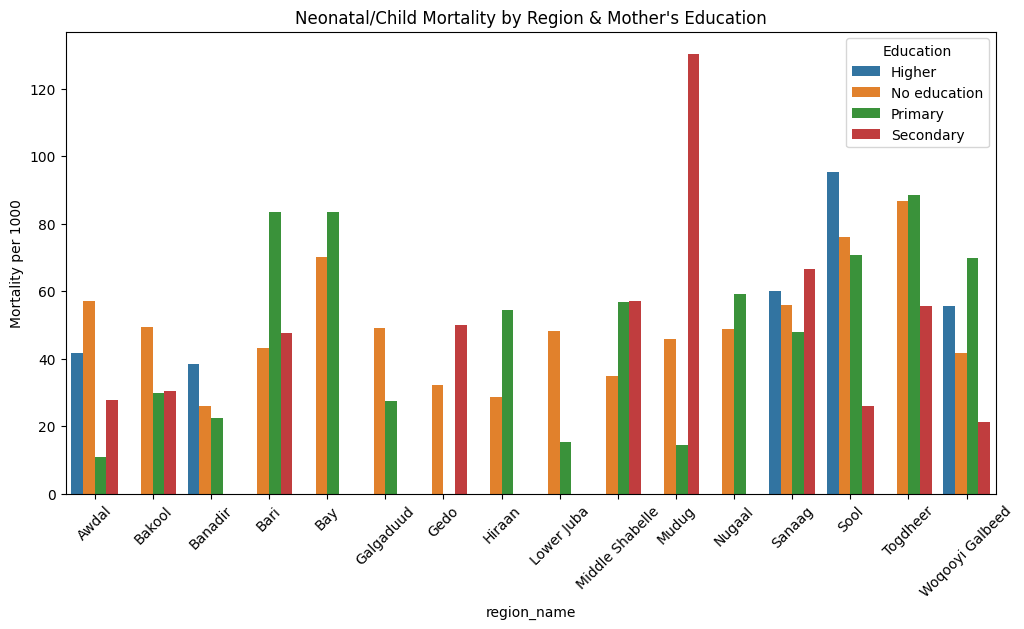

In [ ]:
# Mortality rate by region × education
"""
Education levels code:
0: No formal education
1: Primary education
2: Secondary education
3: Higher education
"""
education_level = {0: "No education", 1: "Primary", 2: "Secondary", 3: "Higher"}

df["Education"] = df["V106"].map(education_level)

edu_mort = (
    df.groupby(["region_name", "Education"])["death"].mean() * 1000
)  # V106: Educational level
edu_mort = edu_mort.reset_index()

# Grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=edu_mort, x="region_name", y="death", hue="Education")
plt.ylabel("Mortality per 1000")
plt.title("Neonatal/Child Mortality by Region & Mother's Education")
plt.xticks(rotation=45)
plt.show()